# Animal Classifier AI
Classifies an animal into one of 15 categories. My test training of the model proved to be over 93% accurate.

### Train Model On Dataset

In [1]:
import tensorflow as tf
import os

batch_size = 80
img_height, img_width = 224, 224

db_dir = os.path.dirname("/kaggle/input/animal-data/animal_data/")

train_ds = tf.keras.utils.image_dataset_from_directory(
    db_dir,
    validation_split = 0.2,
    subset = "training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size = batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  db_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

num_classes = 15

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes),
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

model.save("/kaggle/working/model.keras")

print("saved to /kaggle/working/model.keras")

2024-05-02 16:11:56.978056: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 16:11:56.978207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 16:11:57.158000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.1037 - loss: 2.6909 - val_accuracy: 0.2216 - val_loss: 2.4790
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.2717 - loss: 2.2938 - val_accuracy: 0.3273 - val_loss: 2.1614
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.4533 - loss: 1.7798 - val_accuracy: 0.4691 - val_loss: 1.8343
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.6660 - loss: 1.2703 - val_accuracy: 0.5026 - val_loss: 1.8659
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.7586 - loss: 0.9135 - val_accuracy: 0.5000 - val_loss: 2.2472
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.7849 - loss: 0.8128 - val_accuracy: 0.5722 - val_loss: 1.6885
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8507 - loss: 0.5418 - val_accurac

### Test of Model With Display

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,371,055 (31.93 MB)

 Trainable params: 2,790,351 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,580,704 (21.29 MB)

Image: /kaggle/input/animal-data/animal_data/Bird/Bird_2_4.jpg


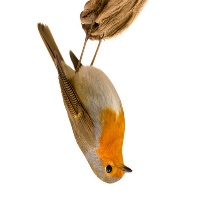

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Prediction: Dog
Prediction (raw): [[ 11.906241     6.5056443    3.6854942    5.572491    10.31427
   15.917629    -0.27741766  -0.9169008    1.829503     4.9286404
    7.0824466   -4.3552084   -8.401633    -4.372992   -12.837476  ]]


In [2]:
import tensorflow as tf
import PIL
import random
import numpy as np
import os

img_height, img_width = 224, 224

model = tf.keras.models.load_model("/kaggle/working/model.keras")

model.summary()

labels = ["Bear", "Bird", "Cat", "Cow", "Deer", "Dog", "Dolphin", "Elephant", "Giraffe", "Horse", "Kangaroo", "Lion", "Panda", "Tiger", "Zebra"]
images = []

for root, dirs, files in os.walk("/kaggle/input/animal-data/animal_data"):
    images.extend(map(lambda dir: os.path.join(root, dir), files))

image_dir = random.choice(images)
image = PIL.Image.open(image_dir)

print("Image:", image_dir)
display(image)

image_array = tf.keras.utils.img_to_array(image)
image_array = image_array.reshape(-1, 224, 224, 3)

result_raw = model.predict(image_array)
result = np.argmax(result_raw[0])
result = labels[result]

print("Prediction:", result)
print("Prediction (raw):", result_raw)